## Online Shoppers behaviour prediction


**Introduction:**
Online shopping is a huge and growing form of purchasing and represents a huge portion of B2C (Business to Customer) revenue. 69% of Americans have shopped online at some point (1), with an average revenue of $1804 per online shopper(2). 36% of Americans shop online at least once per month!  Learning how and when shoppers will research and purchase goods online is important to businesses as they can use customer behavior insights to target advertising, marketing, and deals to potential customers to further increase their sales and revenue. 


**The Data:**
[Link](http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#)<br>
The data set is a set of 18 features: 10 numerical and 8 categorical. This dataset has 12330 entries, split into 10,422 entries where the shoppers did not purchase and 1908 entries where the shoppers did purchase. Each entry is based on unique users in a 1-year period to avoid any trends specific to a specific campaign. 


In [28]:
### Begin code

# Import packages

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

# Read data and display data head

shopping = pd.read_csv('online_shoppers_intention.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Exploratory Data Analysis

In [2]:
# Describe the dataset
shopping.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [3]:
# Check for null values in data
nullcount = shopping.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


Here we can see that there are no null values in the dataset. 
We do not need to fix or replace any null values in the dataset.

In [4]:
# Checking for number of unique values for each feature

uniques = shopping.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


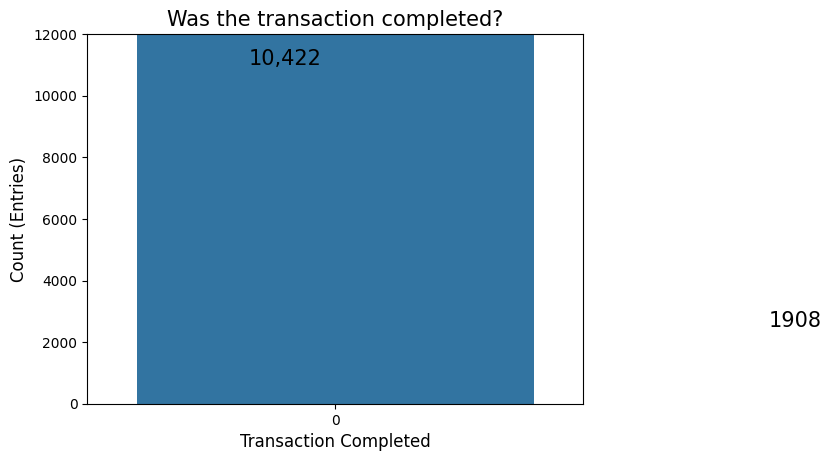

In [5]:
# Visualize the data

sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()


We can see that the number of entries where the customer ended up not purchasing is much higher that the number of entries where the customer ended up completing a transaction. This makes sense, as a majority of normal online shopping ends without a purchase.

## Feature Cleaning

We will try classification prior to any feature engineering to see a baseline classification based on our features. In order to prepare our data, we need to switch our labels to the correct format. We have a few features that need to be adjusted.

First, we drop the month column. The 'Month' column only has 10 unique types, which indicates that it is missing two month's of data. Each month has varying numbers of entries, which could unfairly bias our data to prefer classification by month. We can see below the distribution of each month in the 'Month' column. Additionally, time-sensitivity is already contained in the 'SpecialDay' column, which influences buying decision, so the month column is slightly redundant.

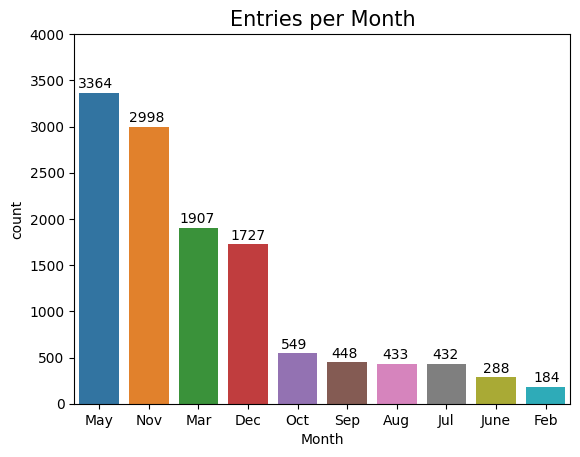

In [6]:
monthly = shopping['Month'].value_counts()

sns.countplot(x=shopping['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

We can see here that the 'Month' column is missing January and April. We can see visually that several months have many samples (May, Nov) and a couple have very few samples (Feb, June). We will remove this column.

Next, let us take a look at the 'OperatingSystems' and 'Browser' columns.

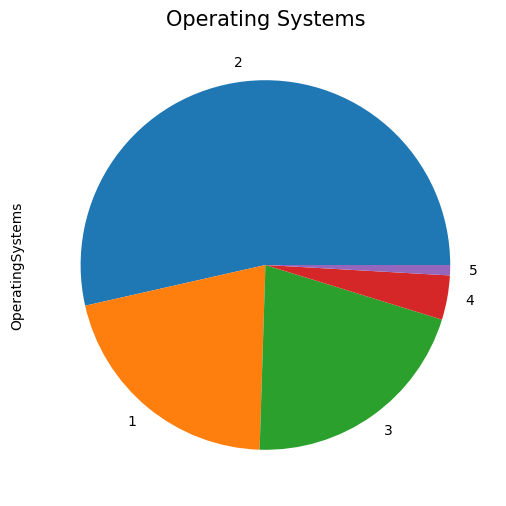

In [7]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8],5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

Here we have the Operating Systems, labeled by number. Low-usage browsers have been consolidated into label '5'.
We can see that a majority of users use operating system \#2. Operating systems can indicate users of a sepcifc type of computer and may portray certain user archetypes (Windows users, Mac users, Linux users). For now, we will forgo usage of this column for our classifier.

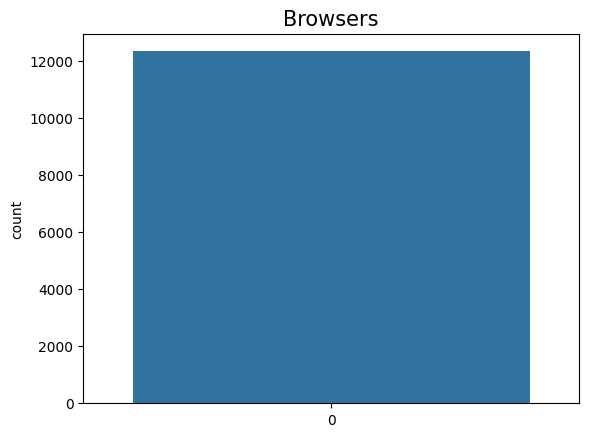

In [8]:
sns.countplot(shopping['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

Browser choice is even more polarizing than Operating System. Here we see that a large majority of users use browser 2, with a smaller number of users using browser 1. All other browsers represent a small subsection of online users. We will not use this as it does not contribute much to our model.

There are several other columns that we leave out:

'Region': We leave regionality out because the regionality may be slightly tied to purchase likelihood, but we want to train our model on a smaller set of features if possible.

'TrafficType': We leave this column out because Traffic sources are not quite useful for calssifying if a user will make a purchase. It usually aids website owners in gauging traffic sources and can assist with determining where they should invest in advertisement.

'Weekend':There is weak correlation between days of the week and online shopping. https://blog.workarea.com/trends-when-do-people-shop-online asserts that Sundays and Mondays have the highest traffic for eCommerce, but only by 16% of weekly revenue, and mostly on Monday, which is not classified as a weekend.

In [9]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

## Label and One Hot Encoding

In order to properly fit our classifier, we will need to encode our string variables to integer labels, then convert our labels from integers to One Hot columns to remove any implied hierarchy.

In [10]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [11]:
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

## Random Forest Classifier

In [13]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.23


In [14]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 89.5


The area under the ROC curve is: 0.89


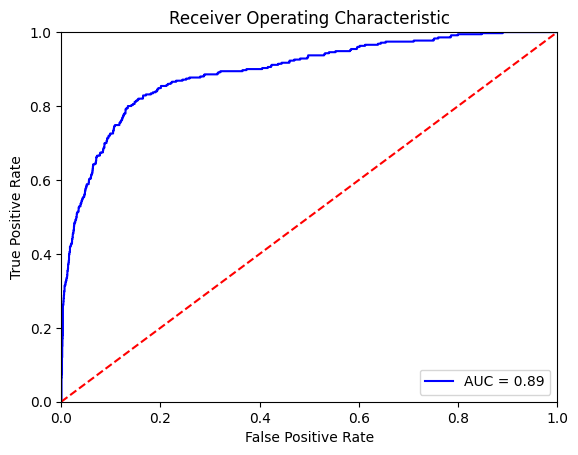

In [15]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


## Stratifying Training Data 

Because the training data is so heavily skewed in the direction of the 'No purchase made' category, we must stratify our training data so that the ratio of training labels is equal. We use the stratified shuffle split package included in the Sci-kit learn library to achieve this.

In [17]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [19]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.5


The area under the ROC curve for unbalanced data is: 0.89
The area under the ROC curve for stratified data is: 0.9


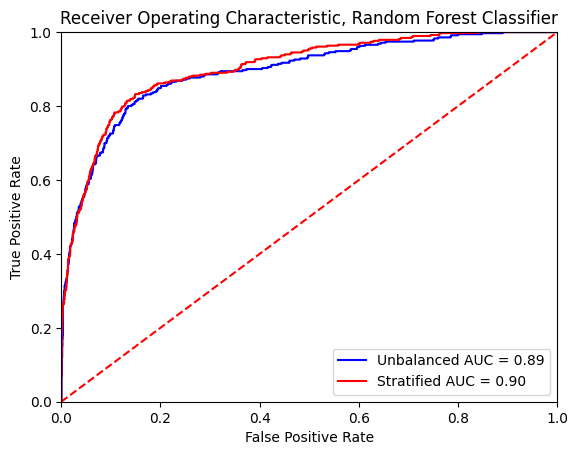

In [20]:
# Let us plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Feature Importance**

To see if we can improve our model, let us track the feature importance of each of our features to see which features matter to the outcome of the prediction.

In [21]:
# 
importances = rfc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_stratified.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.693368)
2. Feature 7 (0.086168)
3. Feature 5 (0.058875)
4. Feature 6 (0.042850)
5. Feature 4 (0.040776)
6. Feature 1 (0.022842)
7. Feature 0 (0.020969)
8. Feature 11 (0.017604)
9. Feature 3 (0.008162)
10. Feature 2 (0.005109)
11. Feature 9 (0.003008)
12. Feature 10 (0.000269)


In [22]:
# Generating a dataframe for our feature importance

col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.693368
ExitRates,0.086168
ProductRelated_Duration,0.058875
BounceRates,0.042850
ProductRelated,0.040776
Administrative_Duration,0.022842
Administrative,0.020969
Visitor_Type_Returning_Visitor,0.017604
Informational_Duration,0.008162
Informational,0.005109


We can see that the "Page Values" seems to be the most impactful feature by a large margin.

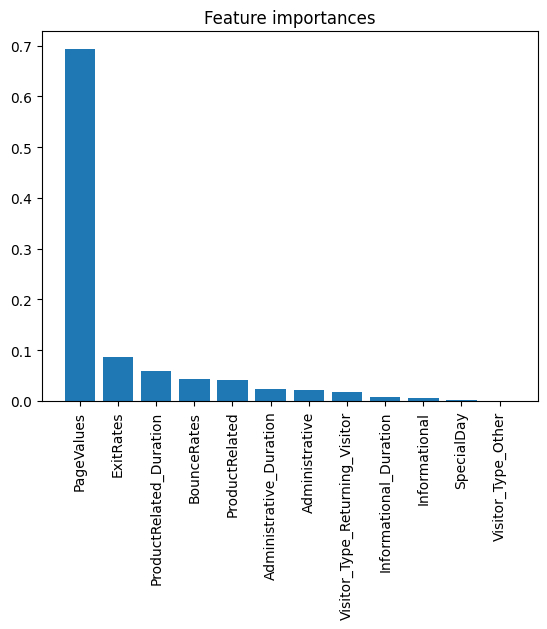

In [23]:
plt.title("Feature importances")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()

Seeing these feature importances, we want to simplify our model to only use features that may heavily contribute to our classification. Using our feature importance chart, we will take the top 5 most impactful features: PageValues, ExitRates, ProductRelated_Duration, BounceRates, ProductRelated. In addition, after creating the simplififed model, we want to measure the effectiveness of our model by using cross validation.

In [24]:
# Creating simple model dataset
simple_model = shopping_clean_merged.drop(['Administrative_Duration','Administrative','Visitor_Type_Returning_Visitor','Informational_Duration','Informational','SpecialDay','Visitor_Type_Other'], axis=1)

# Split train and test data

X_simp = simple_model.drop('Revenue', axis=1)
y_simp = simple_model['Revenue']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)


In [25]:
clf = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)

scores = cross_val_score(clf, X_simp, y_simp, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Accuracy of Classifier over 10-folds: 0.90 (+/- 0.01)


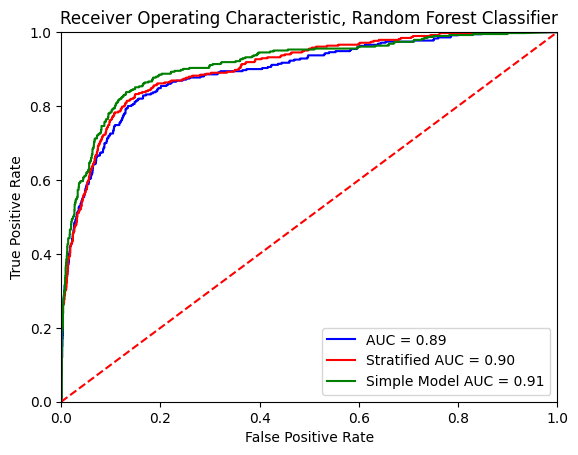

In [26]:
# Now lets compare our simplified model with our previous models:

X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp,stratify=y_simp, test_size=.2, shuffle=True, random_state=1)
clf_simp = RandomForestClassifier(max_depth=5, n_estimators=1000)

clf_simp.fit(X_train_simp,y_train_simp)
y_pred_simp = clf_simp.predict(X_test_simp)
y_prob_simp = clf_simp.predict_proba(X_test_simp)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simp, y_prob_simp)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

All three models seem to have similar performance. Now, we try a dummy classifier to compare results to see if the classifiers are producing better results than guessing.

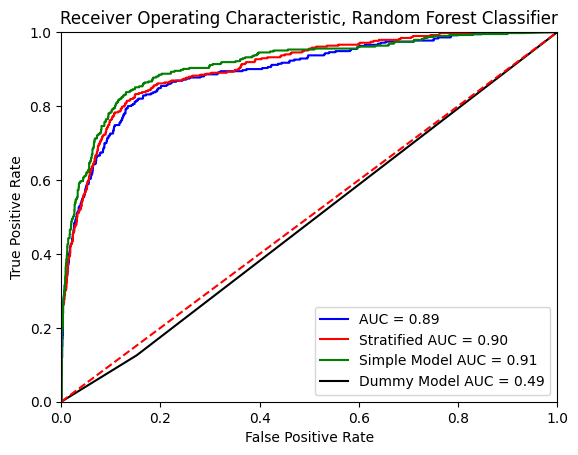

In [27]:
# Dummy Classifier

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train,y_train)

y_pred_dummy = dummy_clf.predict(X_test)
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

fpr_dummy, tpr_dummy, threshold_strat = metrics.roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.plot(fpr_dummy, tpr_dummy, 'k', label = 'Dummy Model AUC = %0.2f' % roc_auc_dummy)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Conclusion**

Our model seems to be much more accurate than guessing. By using a random forest classifier, we are able to achieve approximately 90% accuracy. The dummy classifier seems to be right about 50% of the time, which we should expect to see, as it is making guesses based on the distribution of a stratified dataset. If we were to deploy this model, the most efficient model to select would be our simple model. The simple model performs similarly to our other models, and only bases its classification by five features. 